In [1]:
import garminconnect as gc
import datetime
import json

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
today = datetime.date.today()
startdate = today - datetime.timedelta(days=7) # Select past week
activitytype="running"

In [4]:
def display_json(api_call, output):
    """Format API output for better readability."""

    dashed = "-"*20
    header = f"{dashed} {api_call} {dashed}"
    footer = "-"*len(header)

    print(header)
    print(json.dumps(output, indent=4))
    print(footer)

In [5]:
def display_text(output):
    """Format API output for better readability."""

    dashed = "-"*60
    header = f"{dashed}"
    footer = "-"*len(header)

    print(header)
    print(json.dumps(output, indent=4))
    print(footer)

In [56]:
def init_api(email, password):
    """Initialize Garmin API with your credentials."""

    try:
        # Ask for credentials if not set as environment variables
        if not email or not password:
            email, password = get_credentials()

        api = gc.Garmin(email, password)
        api.login()

        # Save session dictionary to json file for future use
        with open("session.json", "w", encoding="utf-8") as f:
            json.dump(api.session_data, f, ensure_ascii=False, indent=4)
    except (
        gc.GarminConnectConnectionError,
        gc.GarminConnectAuthenticationError,
        gc.GarminConnectTooManyRequestsError,
        requests.exceptions.HTTPError,
    ) as err:
        logger.error("Error occurred during Garmin Connect communication: %s", err)
        return None

    return api

In [57]:
api = init_api("look.at.the.stars.lm90@gmail.com","SspscuiNoi12")

In [58]:
date=datetime.date(2022,9,1)

In [59]:
#display_json(f"api.get_stats('{date.isoformat()}')", api.get_stats(date.isoformat()))

In [60]:
activities = api.get_activities_by_date(
                   date.isoformat(), today.isoformat(), "running"
                )

In [16]:
len(activities)

66

In [12]:
activities[7]

{'activityId': 9995711783,
 'activityName': 'Perugia Corsa',
 'description': None,
 'startTimeLocal': '2022-11-18 07:54:05',
 'startTimeGMT': '2022-11-18 06:54:05',
 'activityType': {'typeId': 1,
  'typeKey': 'running',
  'parentTypeId': 17,
  'isHidden': False,
  'sortOrder': None,
  'restricted': False,
  'trimmable': True},
 'eventType': {'typeId': 9, 'typeKey': 'uncategorized', 'sortOrder': 10},
 'comments': None,
 'parentId': None,
 'distance': 10473.2900390625,
 'duration': 3005.787109375,
 'elapsedDuration': 3005.787109375,
 'movingDuration': 3005.787109375,
 'elevationGain': 47.64999997615814,
 'elevationLoss': 51.28000000119209,
 'averageSpeed': 3.4839999675750732,
 'maxSpeed': 3.9660000801086426,
 'startLatitude': 43.11016439460218,
 'startLongitude': 12.355353590101004,
 'hasPolyline': True,
 'ownerId': 12663743,
 'ownerDisplayName': 'lorenzo.menculini',
 'ownerFullName': 'Lorenzo Menculini',
 'ownerProfileImageUrlSmall': 'https://s3.amazonaws.com/garmin-connect-prod/profile

In [13]:
#api.get_activity_splits(activities[2]['activityId'])

In [31]:
api.get_activity_splits(activities[0]["activityId"])

{'activityId': 10033828036,
 'lapDTOs': [{'startTimeGMT': '2022-11-25T10:10:19.0',
   'startLatitude': 43.10412548482418,
   'startLongitude': 12.386793019250035,
   'distance': 4430.0,
   'duration': 1208.45,
   'movingDuration': 1208.0,
   'elapsedDuration': 1208.45,
   'elevationGain': 0.0,
   'elevationLoss': 0.0,
   'maxElevation': 433.0,
   'minElevation': 433.0,
   'averageSpeed': 3.6649999618530273,
   'averageMovingSpeed': 3.6672185430463577,
   'maxSpeed': 3.9749999046325684,
   'calories': 306.0,
   'bmrCalories': 29.0,
   'averageHR': 149.0,
   'maxHR': 157.0,
   'averageRunCadence': 172.484375,
   'maxRunCadence': 178.0,
   'averageTemperature': 24.0,
   'maxTemperature': 28.0,
   'minTemperature': 23.0,
   'strideLength': 127.51948459968109,
   'endLatitude': 43.10385902412236,
   'endLongitude': 12.386690257117152,
   'maxVerticalSpeed': 0.0,
   'lapIndex': 1,
   'lengthDTOs': [],
   'connectIQMeasurement': [],
   'messageIndex': 0}],
 'eventDTOs': [{'startTimeGMT': '202

In [61]:
data=[]
for activity in activities:
    activity_id = activity["activityId"]
    # display_text(activity)
    # print("\n")
    laps=api.get_activity_splits(activity_id)['lapDTOs']
    data.extend([
        {"activity_type" : activity['activityType']['typeKey'],
         "activity_start": activity['startTimeGMT'],
         "activity_distance": activity['distance'],
         "lap_start": l['startTimeGMT'], 
         "lap_distance": l['distance'],
         "lap_duration": l['duration'],
         "elev_gain": l['elevationGain'],
         "elev_loss": l['elevationLoss'],
         "speed": l['averageSpeed'],
         "stride_length": l['strideLength']/100} for l in laps])

In [82]:
lap_df=pd.DataFrame(data)#,dtype={'activity_start':'datetime64[ns]','lap_start':'datetime64[ns]'})

In [83]:
lap_df=lap_df.astype({'activity_start':'datetime64[ns]','lap_start':'datetime64[ns]'})
#lap_df.dtypes
lap_df['activity_start']=lap_df.activity_start.dt.tz_localize('GMT')
lap_df['lap_start']=lap_df.lap_start.dt.tz_localize('GMT')

In [84]:
import math

In [97]:
lap_df['pace']=lap_df.apply(lambda x: '{}\'{:.0f}"'.format(math.floor((x.lap_duration/x.lap_distance*1000)//60),(x.lap_duration/x.lap_distance*1000)%60), axis=1)

In [98]:
lap_df

,activity_type,activity_start,activity_distance,lap_start,lap_distance,lap_duration,elev_gain,elev_loss,speed,stride_length,pace
0,track_running,2022-11-25 10:10:19+00:00,4430.000000,2022-11-25 10:10:19+00:00,4430.00,1208.450,0.00,0.00,3.665,1.275195,"4'33"""
1,track_running,2022-11-25 09:47:13+00:00,4550.000000,2022-11-25 09:47:13+00:00,100.00,19.738,24.38,0.00,4.925,1.917868,"3'17"""
2,track_running,2022-11-25 09:47:13+00:00,4550.000000,2022-11-25 09:47:33+00:00,180.00,60.466,0.00,0.00,3.025,1.068238,"5'36"""
3,track_running,2022-11-25 09:47:13+00:00,4550.000000,2022-11-25 09:48:33+00:00,110.00,22.386,0.00,0.00,4.890,1.630427,"3'24"""
4,track_running,2022-11-25 09:47:13+00:00,4550.000000,2022-11-25 09:48:56+00:00,160.00,54.071,0.00,0.00,3.006,1.062047,"5'38"""
...,...,...,...,...,...,...,...,...,...,...,...
191,running,2022-09-02 16:29:52+00:00,11601.040039,2022-09-02 17:06:00+00:00,447.44,125.044,0.00,4.28,3.578,1.254100,"4'39"""
192,running,2022-09-02 16:29:52+00:00,11601.040039,2022-09-02 17:08:05+00:00,1004.99,230.937,7.00,4.57,4.352,1.435300,"3'50"""
193,running,2022-09-02 16:29:52+00:00,11601.040039,2022-09-02 17:11:56+00:00,444.38,125.238,0.00,4.55,3.548,1.260900,"4'42"""
194,running,2022-09-02 16:29:52+00:00,11601.040039,2022-09-02 17:14:01+00:00,1020.21,231.366,7.93,2.27,4.410,1.447000,"3'47"""


In [99]:
clean_df=(lap_df.query('(activity_type == "track_running" and lap_distance >= 400) or (activity_type == "running" and lap_distance >= 1000)')
       .query('(elev_gain/lap_distance < 0.06) and (elev_loss/lap_distance < 0.06)'))


In [100]:
c1, c0 = np.polyfit(clean_df.speed,clean_df.stride_length,1)

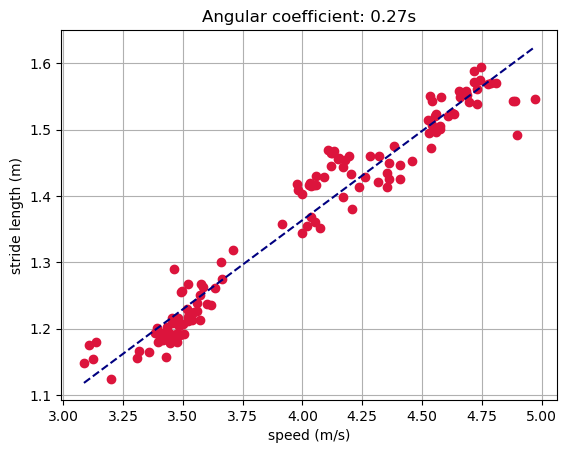

In [17]:
# plt.figure()
# 
# plt.plot(speeds,lengths,'o', color='crimson')
# plt.plot([speeds.min(),speeds.max()], [c0+c1*speeds.min(),c0+c1*speeds.max()],'--',color='navy')
# plt.grid()
# plt.xlabel("speed (m/s)")
# plt.ylabel("stride length (m)")
# plt.title("Angular coefficient: {:.2f}s".format(c1))
# plt.show() 

In [131]:
import plotly.express as px
import plotly.graph_objects as go

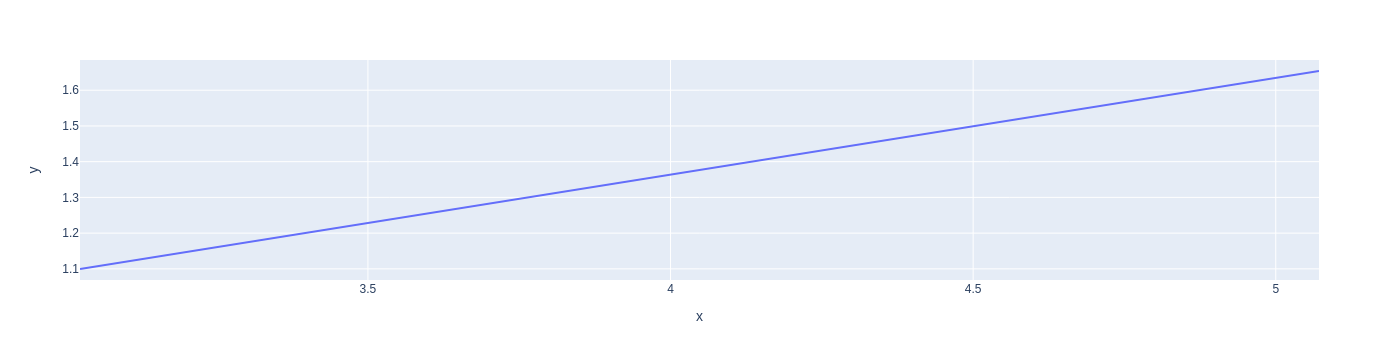

In [178]:
px.line(x=[clean_df.speed.min()*0.98,clean_df.speed.max()*1.02],y=[c0+c1*clean_df.speed.min()*0.98,c0+c1*clean_df.speed.max()*1.02,])

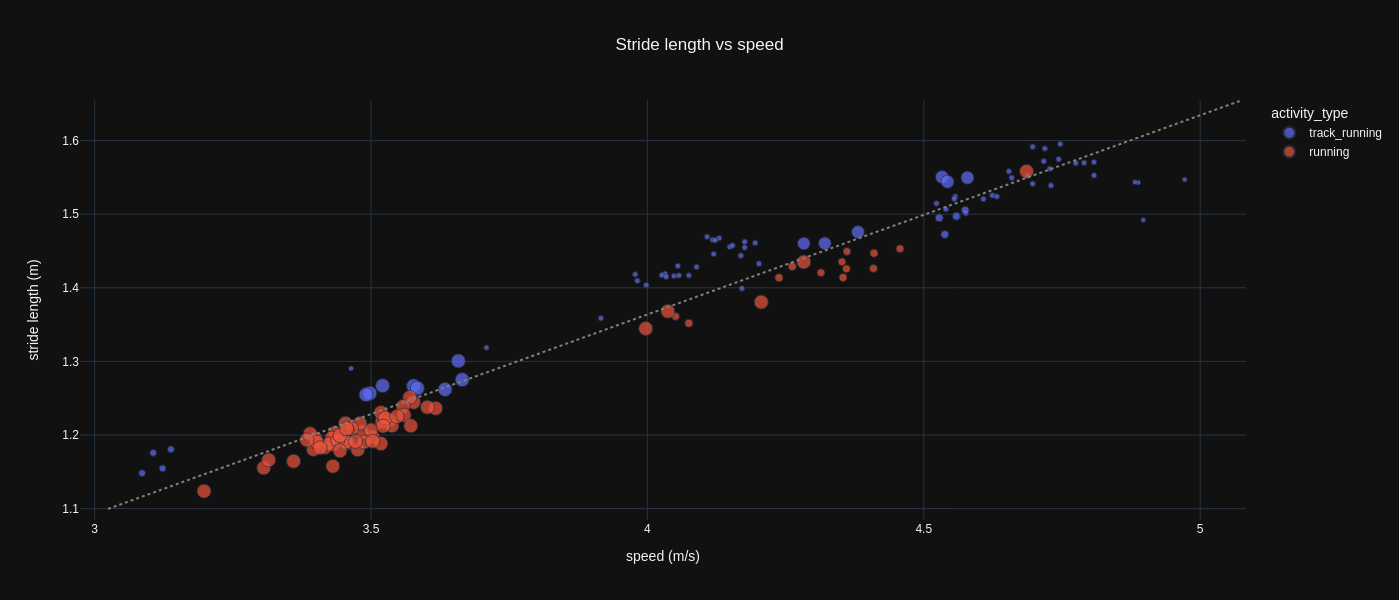

In [182]:
fig = px.scatter(clean_df,
    x="speed", 
    y="stride_length", 
    title="Stride length vs speed",
    width=800,
    height=600,
    labels={'speed':'speed (m/s)','stride_length':'stride length (m)'},
    hover_data=['activity_start','pace','lap_distance'],
    size=clean_df['lap_distance'].clip(0,10**3.5),
    size_max=10,
    color='activity_type',
    template='plotly_dark'
)
fig.update_layout(title_x=0.5)
#fig.layout.update(xaxis2 = go.layout.XAxis(overlaying='x',side='top'))
fig.add_shape(
        type='line',
        x0=clean_df.speed.min()*0.98,
        y0=c0+c1*clean_df.speed.min()*0.98,
        x1=clean_df.speed.max()*1.02,
        y1=c0+c1*clean_df.speed.max()*1.02,
        line=dict(
            dash='dot', color='gray'
        )
)
fig.show()

In [16]:
race_day=api.get_activities_by_date(date.isoformat(),date.isoformat(),"running")

In [34]:
race_day[0]

{'activityId': 10007295763,
 'activityName': 'Santarcangelo di Romagna Corsa',
 'description': None,
 'startTimeLocal': '2022-11-20 09:31:09',
 'startTimeGMT': '2022-11-20 08:31:09',
 'activityType': {'typeId': 1,
  'typeKey': 'running',
  'parentTypeId': 17,
  'isHidden': False,
  'sortOrder': None,
  'restricted': False,
  'trimmable': True},
 'eventType': {'typeId': 9, 'typeKey': 'uncategorized', 'sortOrder': 10},
 'comments': None,
 'parentId': None,
 'distance': 10053.580078125,
 'duration': 2145.48291015625,
 'elapsedDuration': 2145.48291015625,
 'movingDuration': 2145.0,
 'elevationGain': 28.059999998658895,
 'elevationLoss': 31.87000000476837,
 'averageSpeed': 4.685999870300293,
 'maxSpeed': 6.102000236511231,
 'startLatitude': 44.06300162896514,
 'startLongitude': 12.44685203768313,
 'hasPolyline': True,
 'ownerId': 12663743,
 'ownerDisplayName': 'lorenzo.menculini',
 'ownerFullName': 'Lorenzo Menculini',
 'ownerProfileImageUrlSmall': 'https://s3.amazonaws.com/garmin-connect-p